In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('train.csv')
TARGETS = df.columns[-7]
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


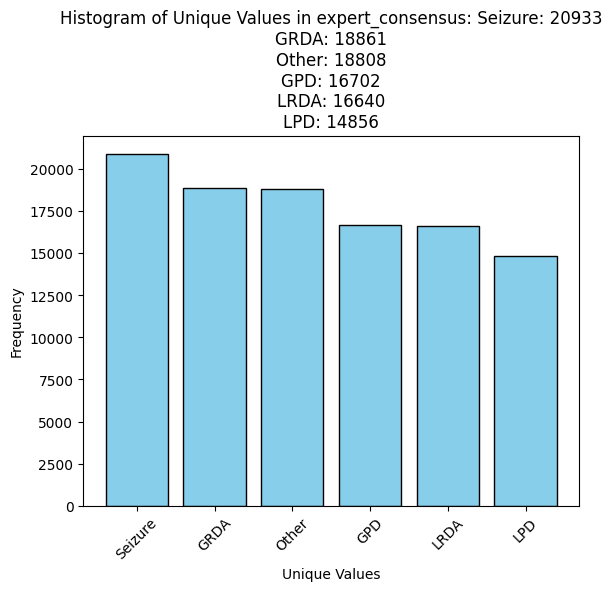

In [3]:

column_name = 'expert_consensus'


unique_values = df[column_name].unique()


value_counts = df[column_name].value_counts()

plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')


plt.title('Histogram of Unique Values in expert_consensus: ' + column_name )
plt.xlabel('Unique Values')
plt.ylabel('Frequency')


title = 'Histogram of Unique Values in expert_consensus: '
for value, count in value_counts.items():
    title += '{}: {}\n'.format(value, count)
plt.title(title.strip())


plt.xticks(rotation=45)


plt.show()


In [ ]:
print(value_counts)

expert_consensus
LPD        1036
Other       801
GPD         586
Seizure     338
LRDA         41
GRDA         12
Name: count, dtype: int64


In [ ]:
df.describe()

,Unnamed: 0,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,2814.000000,2.814000e+03,2814.000000,2814.000000,2.814000e+03,2814.000000,2814.000000,2.814000e+03,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,1406.500000,2.130555e+09,7.125089,46.325515,1.050274e+09,14.760483,278.642857,2.114374e+09,34651.747335,0.607676,4.664890,2.668443,0.072850,0.021322,4.594883
std,812.476153,1.248903e+09,14.072055,104.835900,6.436541e+08,35.556260,738.417673,1.246564e+09,18370.149888,1.666345,6.502782,5.467080,0.599225,0.325873,7.480706
min,0.000000,4.431217e+06,0.000000,0.000000,5.487370e+06,0.000000,0.000000,1.027516e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,703.250000,9.765207e+08,1.000000,4.000000,5.015602e+08,2.000000,8.000000,1.028780e+09,18186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1406.500000,2.053873e+09,3.000000,20.000000,1.090749e+09,5.000000,36.000000,2.092434e+09,37094.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2109.750000,3.225527e+09,7.000000,46.000000,1.572302e+09,10.000000,257.500000,3.197608e+09,49713.000000,0.000000,13.000000,0.000000,0.000000,0.000000,12.000000
max,2813.000000,4.270035e+09,211.000000,1866.000000,2.146188e+09,356.000000,8569.000000,4.294082e+09,65442.000000,15.000000,18.000000,16.000000,5.000000,5.000000,24.000000


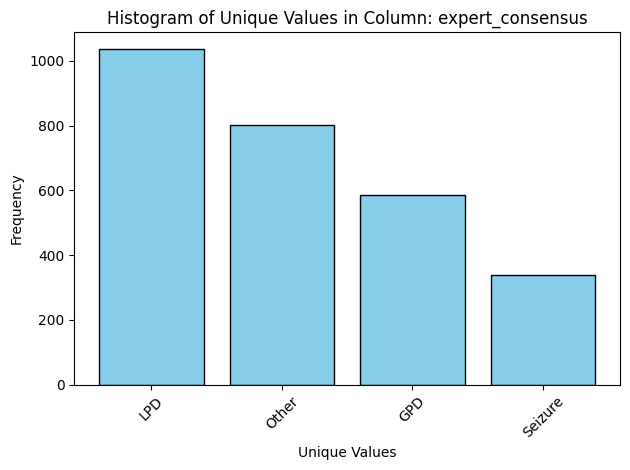

In [ ]:

value_counts = value_counts.sort_values(ascending=False)


value_counts = value_counts[:-2]

plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')


plt.title('Histogram of Unique Values in Column: ' + column_name )
plt.xlabel('Unique Values')
plt.ylabel('Frequency')


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(['lrda_vote','grda_vote'],axis = 1)

In [ ]:
categories_to_remove = ['LRDA', 'GRDA']

df_filtered = df[~df[column_name].isin(categories_to_remove)]

In [ ]:
df1 = df_filtered[df_filtered['expert_consensus']=='LRDA']
df1

,Unnamed: 0,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,other_vote


In [ ]:
class_counts = df_filtered[column_name].value_counts()

min_class_count = class_counts.min()


resampled_df = pd.DataFrame()


for class_label in class_counts.index:

    class_subset = df_filtered[df_filtered[column_name] == class_label]

    resampled_subset = class_subset.sample(n=min_class_count, random_state=42)
    resampled_df = pd.concat([resampled_df, resampled_subset], ignore_index=True)



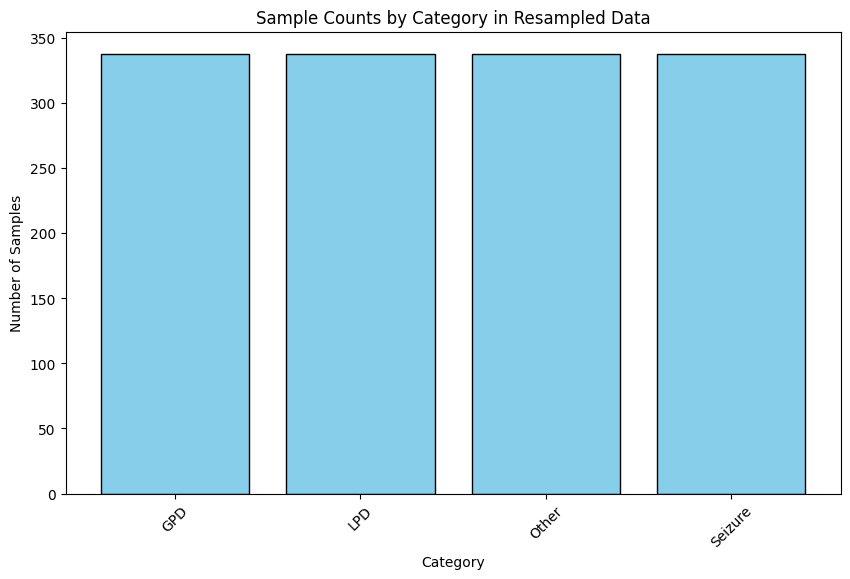

In [ ]:

value_counts_resampled = resampled_df[column_name].value_counts()

value_counts_resampled = value_counts_resampled.sort_index()


plt.figure(figsize=(10, 6))
plt.bar(value_counts_resampled.index, value_counts_resampled.values, color='skyblue', edgecolor='black')


plt.title('Sample Counts by Category in Resampled Data')
plt.xlabel('Category')
plt.ylabel('Number of Samples')


plt.xticks(rotation=45)

plt.show()


In [ ]:

resampled_df.to_csv('resampled_data.csv', index=False)
df_filtered.to_csv('df_filtered.csv', index=False)
